In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [56]:
# Read the student dataset
student_dt = pd.read_csv('student-data.csv')

In [57]:
# To display all the columns in the dataset
student_dt.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [58]:
# Checking the null values using isnull() function 
student_dt.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [59]:
# Checking column headings
student_dt.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [60]:
# Details on dependent variable
student_dt['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [61]:
 # Information on data types 
student_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [62]:
# Statistics details of integer values
student_dt.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:xlabel='passed', ylabel='age'>

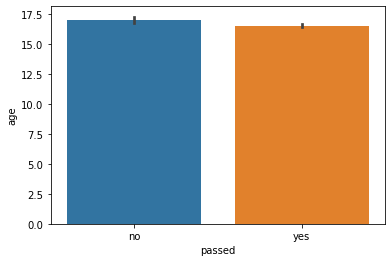

In [63]:
#Plotting data comparing to pass ratio
sns.barplot(x = "passed", y = "age", data = student_dt)

<AxesSubplot:xlabel='passed', ylabel='studytime'>

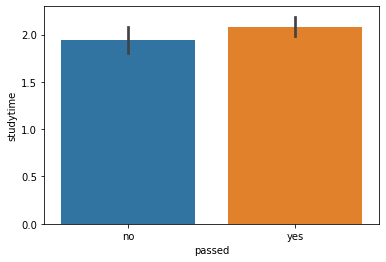

In [64]:
sns.barplot(x = "passed", y = "studytime", data = student_dt)

In [65]:
# using the label encoder and one hot encoder to transfrom data into integers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_en= LabelEncoder()
a=['school','Mjob', 'Fjob', 'reason', 'guardian','higher','passed', 'sex','address','famsize','Pstatus','schoolsup', 'famsup', 'paid']
for i in np.arange(len(a)):
    student_dt[a[i]]= label_en.fit_transform(student_dt[a[i]])
student_dt = pd.get_dummies(student_dt, columns=[ 'activities', 'nursery', 'internet', 'romantic'])

In [66]:
# Checking the column names
student_dt.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [67]:
#Adding new columns by connecting relatable columns and droping the old columns 
student_dt['Leisure_time'] = student_dt[['freetime', 'goout']].mean(axis=1)
student_dt['Alcohol_con'] = student_dt[[ 'Dalc', 'Walc']].mean(axis=1)
student_dt = student_dt.drop(['freetime','goout','Dalc', 'Walc'],axis=1)

In [68]:
student_dt

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities_no,activities_yes,nursery_no,nursery_yes,internet_no,internet_yes,romantic_no,romantic_yes,Leisure_time,Alcohol_con
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,1,1,0,1,0,3.5,1.0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,1,0,0,1,1,0,3.0,1.0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,0,1,0,1,1,0,2.5,2.5
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,1,0,1,0,1,2.0,1.0
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,1,1,0,1,0,2.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,1,0,0,1,1,0,1,0,4.5,4.5
391,1,1,17,1,1,1,3,1,3,3,...,1,0,1,0,0,1,1,0,4.5,3.5
392,1,1,21,0,0,1,1,1,2,2,...,1,0,1,0,1,0,1,0,4.0,3.0
393,1,1,18,0,1,1,3,2,3,2,...,1,0,1,0,0,1,1,0,2.5,3.5


In [69]:
#Selecting the x and y variables
x = student_dt.drop(['passed'],axis=1)
y = student_dt['passed']

In [70]:
# Importing metrics and train_test_split and spliting the data
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=2, test_size= 0.3)

In [71]:
#Importing the Randomforest algorithum and fitting the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [72]:
#Checking the scores of the model
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))

Accuracy Score is: 0.6890756302521008
Recall Score is: 0.9
Precision Score: 0.7128712871287128
F1 score is: 0.7955801104972375


In [73]:
# Checking the confusion matrix for random forest model
confusion_matrix(y_test, y_pred)

array([[10, 29],
       [ 8, 72]], dtype=int64)

school:0.012835677539556143
sex:0.023787190122275814
age:0.05898427544939899
address:0.014967504670084588
famsize:0.01680712858078663
Pstatus:0.012311363404503147
Medu:0.0435542235004523
Fedu:0.0357864888503993
Mjob:0.04806153782964235
Fjob:0.038372502969739854
reason:0.042337110058920165
guardian:0.025203904667596005
traveltime:0.023019512736439655
studytime:0.04140633448871214
failures:0.08589758686984542
schoolsup:0.023277331175808876
famsup:0.018312214028915058
paid:0.01825981108117652
higher:0.012778020148667883
famrel:0.04488927542071019
freetime:0.043103307631838214
goout:0.08274241752278332
Dalc:0.017417144157236157
Walc:0.01567767423633968
health:0.010835146936222284
absences:0.010352803985341741
passed:0.013447969611263782
activities_no:0.013760309358243435
activities_yes:0.015750967748283072
nursery_no:0.019066570963139483
nursery_yes:0.061082980361837104
internet_no:0.05591371389384063


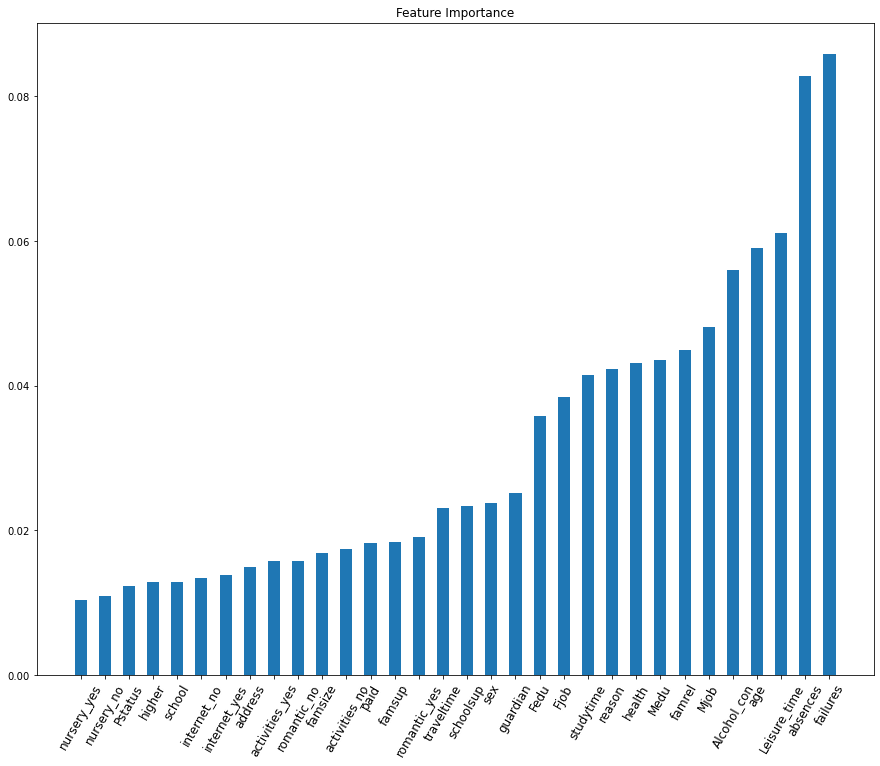

In [76]:
# Checking feature importance
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
importances=rf.feature_importances_
for i,features in zip(importances,['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'higher', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed','activities_no', 'activities_yes', 'nursery_no', 'nursery_yes','internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']):
    print("{}:{}".format(features,i))
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Barplot: Add bars
plt.figure(figsize=(15,12))
plt.bar(range(x_train.shape[1]), importances[indices],width=0.5)

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]),names, rotation=60, fontsize = 12)
#from here we can see that absences is the important features for determining the grades of students

# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [77]:
#Importing KNN model and fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [78]:
# Checking the value scores for KNN model
print('Accuracy Score is:', accuracy_score(y_test, y_pred_knn))
print('Recall Score is:', recall_score(y_test, y_pred_knn))
print('Precision Score:', precision_score(y_test, y_pred_knn))
print('F1 score is:', f1_score(y_test, y_pred_knn))

Accuracy Score is: 0.7058823529411765
Recall Score is: 0.8875
Precision Score: 0.7319587628865979
F1 score is: 0.8022598870056498


In [83]:
# Checking the confusion matrix for KNN model
confusion_matrix(y_test, y_pred_knn)

array([[13, 26],
       [ 9, 71]], dtype=int64)

In [82]:
# Importing the SVM model and fitting the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_SVC = classifier.predict(x_test)

In [84]:
# Checking the value score for SVM models
print('Accuracy Score is:', accuracy_score(y_test, y_pred_SVC))
print('Recall Score is:', recall_score(y_test, y_pred_SVC))
print('Precision Score:', precision_score(y_test, y_pred_SVC))
print('F1 score is:', f1_score(y_test, y_pred_SVC))

Accuracy Score is: 0.6638655462184874
Recall Score is: 0.9875
Precision Score: 0.6694915254237288
F1 score is: 0.797979797979798


Based on the models tested here, KNN model shows better results than others in terms of F1 score, accuracy and precision score.